In [1]:
import pandas as pd                
import numpy as np
import matplotlib.pyplot as plt     
train_data='C:/Users/swetha/Desktop/train.csv'
train_data=pd.read_csv(train_data)
train_data.describe()
test_data='C:/Users/swetha/Desktop/test.csv'
test_data=pd.read_csv(test_data)
test_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [8]:
print("train_data shape:", train_data.shape)
print("test_data shape:", test_data.shape)


train_data shape: (1460, 81)
test_data shape: (1459, 80)


In [10]:
print(train_data.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008     

In [11]:
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)
print (train_data.SalePrice.describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


Skew is: 1.8828757597682129


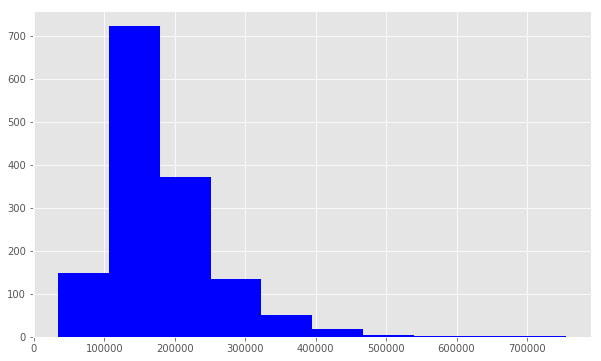

In [12]:
print ("Skew is:", train_data.SalePrice.skew())
plt.hist(train_data.SalePrice, color='blue')
plt.show()


 Skew is: 0.12133506220520406


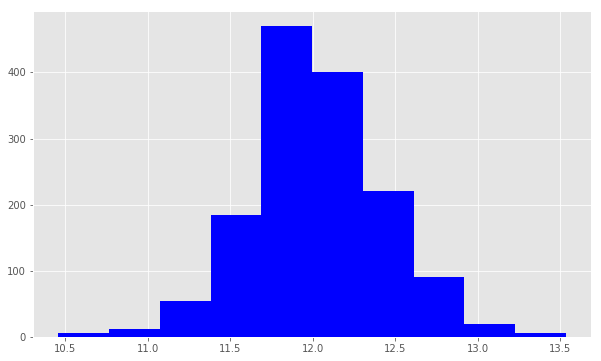

In [13]:
target = np.log(train_data.SalePrice)
print ("\n Skew is:", target.skew())
plt.hist(target, color='blue')
plt.show()

In [14]:
numeric_features = train_data.select_dtypes(include=[np.number])
corr = numeric_features.corr()
print (corr['SalePrice'].sort_values(ascending=False)[:5], '\n')
print (corr['SalePrice'].sort_values(ascending=False)[-5:])


SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


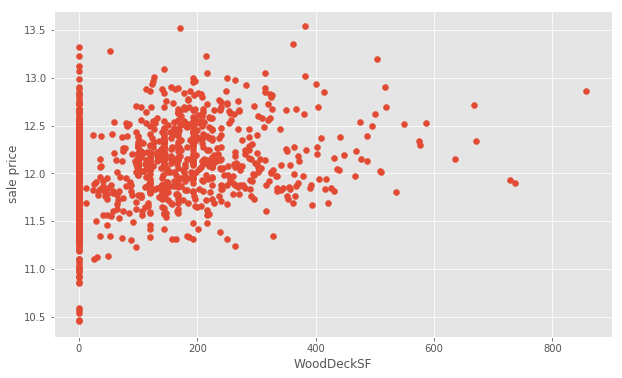

In [15]:
plt.scatter(x=train_data['WoodDeckSF'],y=target)
plt.ylabel('sale price')
plt.xlabel('WoodDeckSF')
plt.show()

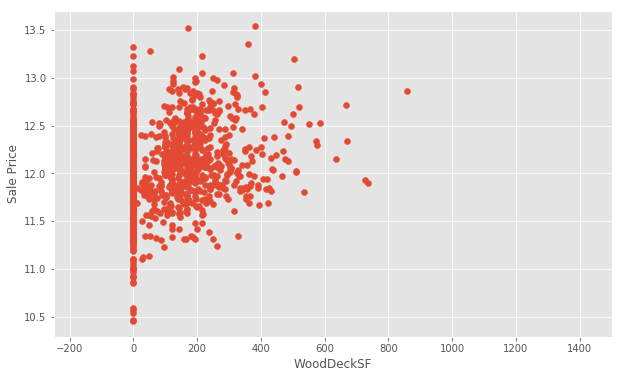

In [16]:
train_data=train_data[train_data['WoodDeckSF']< 1200]
plt.scatter(x=train_data['WoodDeckSF'],y=np.log(train_data.SalePrice))
plt.xlim(-250,1500)
plt.ylabel('Sale Price')
plt.xlabel('WoodDeckSF')
plt.show()

In [17]:
nulls = pd.DataFrame(train_data.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
print(nulls)

              Null Count
Feature                 
PoolQC              1453
MiscFeature         1406
Alley               1369
Fence               1179
FireplaceQu          690
LotFrontage          259
GarageCond            81
GarageType            81
GarageYrBlt           81
GarageFinish          81
GarageQual            81
BsmtExposure          38
BsmtFinType2          38
BsmtFinType1          37
BsmtCond              37
BsmtQual              37
MasVnrArea             8
MasVnrType             8
Electrical             1
Utilities              0
YearRemodAdd           0
MSSubClass             0
Foundation             0
ExterCond              0
ExterQual              0


In [18]:
categoricals = train_data.select_dtypes(exclude=[np.number])
print(categoricals.describe())

       MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1      ...      GarageType  \
count       1460         1460       1460      ...            1379   
unique         3           25          9      ...               6   
top          Gtl        NAmes       Norm      ...          Attchd   
freq        1382          225       1260      ...             870   

       GarageFinish GarageQual GarageCond PavedDrive PoolQC  Fence  \
count          1379       1379       1379       1460      7    281   
unique            3          5          5          3      3      4   
top             Unf         TA         TA          Y     Gd  MnPrv   
freq    

In [19]:
print ("Original: \n")
print (train_data.Street.value_counts(), "\n")

Original: 

Pave    1454
Grvl       6
Name: Street, dtype: int64 



In [21]:
train_data['enc_street'] = pd.get_dummies(train_data.Street, drop_first=True)
test_data['enc_street'] = pd.get_dummies(test_data.Street, drop_first=True)
print ('Encoded: \n')
print (train_data.enc_street.value_counts())

Encoded: 

1    1454
0       6
Name: enc_street, dtype: int64


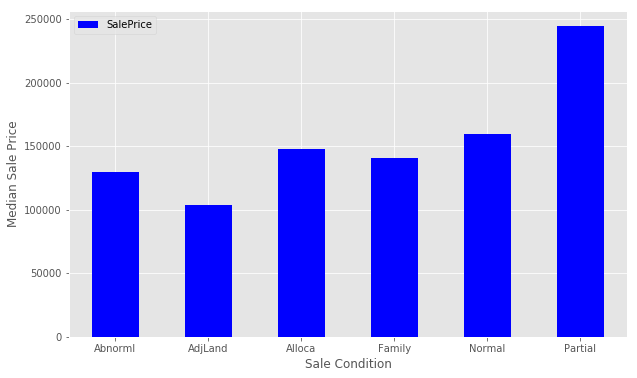

In [22]:
condition_pivot = train_data.pivot_table(index='SaleCondition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

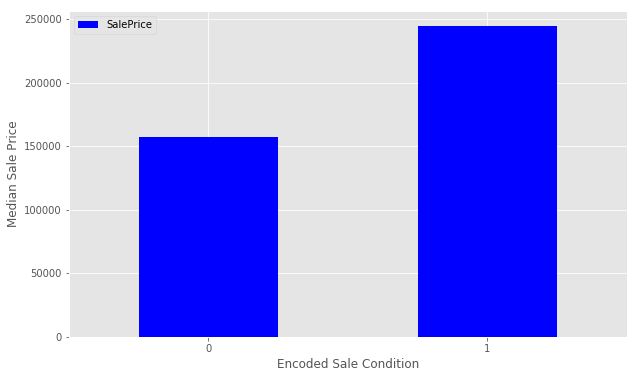

In [23]:
def encode(x) : return 1 if x== 'Partial' else 0
train_data['enc_condition'] = train_data.SaleCondition.apply(encode)
test_data['enc_condition'] = test_data.SaleCondition.apply(encode)
condition_pivot = train_data.pivot_table(index='enc_condition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Encoded Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [26]:
data = train_data.select_dtypes(include=[np.number]).interpolate().dropna()

print(sum(data.isnull().sum() != 0))

y = np.log(train_data.SalePrice)
X = data.drop(['SalePrice', 'Id'], axis=1)

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(X, y, random_state=42, test_size=.50)

lr = linear_model.LinearRegression()

model = lr.fit(X_train_data, y_train_data)
print("R^2 is: \n", model.score(X_test_data, y_test_data))


0
R^2 is: 
 0.8564064602783424


RMSE is: 
 0.02394509463942047


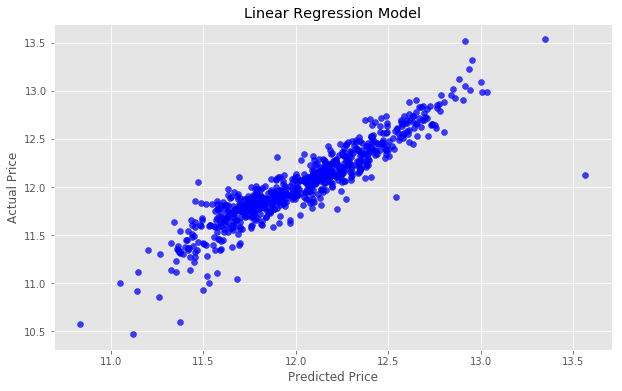

In [27]:
predictions = model.predict(X_test_data)
print('RMSE is: \n', mean_squared_error(y_test_data, predictions))
actual_values = y_test_data
plt.scatter(predictions, actual_values, alpha=.75,
            color='b') 
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

In [29]:
submission = pd.DataFrame()
submission['Id']= test_data.Id
feats = test_data.select_dtypes(
include=[np.number]).drop(['Id'], axis=1).interpolate()
predictions = model.predict(feats)
final_predictions = np.exp(predictions)
print("Original predictions are: \n", predictions[:40], "\n")
print("Final predictions are: \n", final_predictions[:40])

Original predictions are: 
 [11.64895308 11.94044415 12.02718676 12.16293269 12.09403452 12.07047626
 12.1687319  12.04426022 12.17618814 11.67184269 12.16642843 11.61225858
 11.52634696 11.95546319 11.71022329 12.72590215 12.42180477 12.51715624
 12.4580164  12.93300047 12.59926236 12.1888906  12.0113667  11.98331652
 12.21426629 12.22087499 12.65961758 12.40790143 12.13720351 12.2588244
 12.16809354 11.46426006 12.34979425 12.61164918 12.55310659 12.22537645
 12.0431446  11.95569907 12.02735878 11.95820936] 

Final predictions are: 
 [114571.35343198 153344.78374893 167240.26268141 191555.46600358
 178802.03377128 174638.99980394 192669.56384032 170120.14884681
 194111.52398311 117224.09162669 192226.26594999 110443.41456896
 101351.19674025 155665.25627003 121810.67644177 336348.17931076
 248153.99179247 272980.66261582 257304.73463441 413743.07486959
 296339.89113047 196592.94557298 164615.32964291 160061.99951776
 201645.46075501 202982.48872687 314776.32245404 244727.69658731
 18

In [32]:
submission['SalePrice'] = final_predictions

In [33]:
submission

,Id,SalePrice
0,1461,114571.353432
1,1462,153344.783749
2,1463,167240.262681
3,1464,191555.466004
4,1465,178802.033771
5,1466,174638.999804
6,1467,192669.563840
7,1468,170120.148847
8,1469,194111.523983
9,1470,117224.091627
